In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data from csv file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

data = pd.read_csv("messidor_features.aa.txt", names = col_names)
print(data.shape)
data.head(10)


(1151, 20)


quality  prescreen  ma2  ma3  ma4  ma5  ma6  ma7   exudate8   exudate9  \
0        1          1   22   22   22   19   18   14  49.895756  17.775994   
1        1          1   24   24   22   18   16   13  57.709936  23.799994   
2        1          1   62   60   59   54   47   33  55.831441  27.993933   
3        1          1   55   53   53   50   43   31  40.467228  18.445954   
4        1          1   44   44   44   41   39   27  18.026254   8.570709   
5        1          1   44   43   41   41   37   29  28.356400   6.935636   
6        1          0   29   29   29   27   25   16  15.448398   9.113819   
7        1          1    6    6    6    6    2    1  20.679649   9.497786   
8        1          1   22   21   18   15   13   10  66.691933  23.545543   
9        1          1   79   75   73   71   64   47  22.141784  10.054384   

   exudate10  exudate11  exudate12  exudate13  exudate14  exudate15    euDist  \
0   5.270920   0.771761   0.018632   0.006864   0.003923   0.003923  0.486903   
1   3.325423   0.234185   0.003903   0.003903   0.003903   0.003903  0.520908   
2  12.687485   4.852282   1.393889   0.373252   0.041817   0.007744  0.530904   
3   9.118901   3.079428   0.840261   0.272434   0.007653   0.001531  0.483284   
4   0.410381   0.000000   0.000000   0.000000   0.000000   0.000000  0.475935   
5   2.305771   0.323724   0.000000   0.000000   0.000000   0.000000  0.502831   
6   1.633493   0.000000   0.000000   0.000000   0.000000   0.000000  0.541743   
7   1.223660   0.150382   0.000000   0.000000   0.000000   0.000000  0.576318   
8   6.151117   0.496372   0.000000   0.000000   0.000000   0.000000  0.500073   
9   0.874633   0.099780   0.023386   0.000000   0.000000   0.000000  0.560959   

   diameter  amfm_class  label  
0  0.100025           1      0  
1  0.144414           0      0  
2  0.128548           0      1  
3  0.114790           0      0  
4  0.123572           0      1  
5  0.126741           0      1  
6  0.139575           0      1  
7  0.071071           1      0  
8  0.116793           0      1  
9  0.109134           0      1

In [3]:
#EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. It let us to summarize data main characteristics.

In [4]:
data.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   quality     1151 non-null   int64  
 1   prescreen   1151 non-null   int64  
 2   ma2         1151 non-null   int64  
 3   ma3         1151 non-null   int64  
 4   ma4         1151 non-null   int64  
 5   ma5         1151 non-null   int64  
 6   ma6         1151 non-null   int64  
 7   ma7         1151 non-null   int64  
 8   exudate8    1151 non-null   float64
 9   exudate9    1151 non-null   float64
 10  exudate10   1151 non-null   float64
 11  exudate11   1151 non-null   float64
 12  exudate12   1151 non-null   float64
 13  exudate13   1151 non-null   float64
 14  exudate14   1151 non-null   float64
 15  exudate15   1151 non-null   float64
 16  euDist      1151 non-null   float64
 17  diameter    1151 non-null   float64
 18  amfm_class  1151 non-null   int64  
 19  label       1151 non-null  

In [5]:
#Data quality checks

In [6]:
data.isnull().sum()

quality       0
prescreen     0
ma2           0
ma3           0
ma4           0
ma5           0
ma6           0
ma7           0
exudate8      0
exudate9      0
exudate10     0
exudate11     0
exudate12     0
exudate13     0
exudate14     0
exudate15     0
euDist        0
diameter      0
amfm_class    0
label         0
dtype: int64

In [7]:
data.describe()

quality    prescreen          ma2          ma3          ma4  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean      0.996525     0.918332    38.428323    36.909644    35.140747   
std       0.058874     0.273977    25.620913    24.105612    22.805400   
min       0.000000     0.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000    16.000000    16.000000    15.000000   
50%       1.000000     1.000000    35.000000    35.000000    32.000000   
75%       1.000000     1.000000    55.000000    53.000000    51.000000   
max       1.000000     1.000000   151.000000   132.000000   120.000000   

               ma5          ma6          ma7     exudate8     exudate9  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean     32.297133    28.747176    21.151173    64.096674    23.088012   
std      21.114767    19.509227    15.101560    58.485289    21.602696   
min       1.000000     1.000000     1.000000     0.349274     0.000000   
25%      14.000000    11.000000     8.000000    22.271597     7.939315   
50%      29.000000    25.000000    18.000000    44.249119    17.038020   
75%      48.000000    43.000000    32.000000    87.804112    31.305692   
max     105.000000    97.000000    89.000000   403.939108   167.131427   

         exudate10    exudate11    exudate12    exudate13    exudate14  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean      8.704610     1.836489     0.560738     0.212290     0.085674   
std      11.567589     3.923224     2.484111     1.057126     0.398717   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.249050     0.081554     0.000000     0.000000     0.000000   
50%       4.423472     0.484829     0.022248     0.001554     0.000000   
75%      11.766880     1.921648     0.191953     0.038450     0.004832   
max     106.070092    59.766121    51.423208    20.098605     5.937799   

         exudate15       euDist     diameter   amfm_class        label  
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000  
mean      0.037225     0.523212     0.108431     0.336229     0.530843  
std       0.178959     0.028055     0.017945     0.472624     0.499265  
min       0.000000     0.367762     0.057906     0.000000     0.000000  
25%       0.000000     0.502855     0.095799     0.000000     0.000000  
50%       0.000000     0.523308     0.106623     0.000000     1.000000  
75%       0.003851     0.543670     0.119591     1.000000     1.000000  
max       3.086753     0.592217     0.219199     1.000000     1.000000

F:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


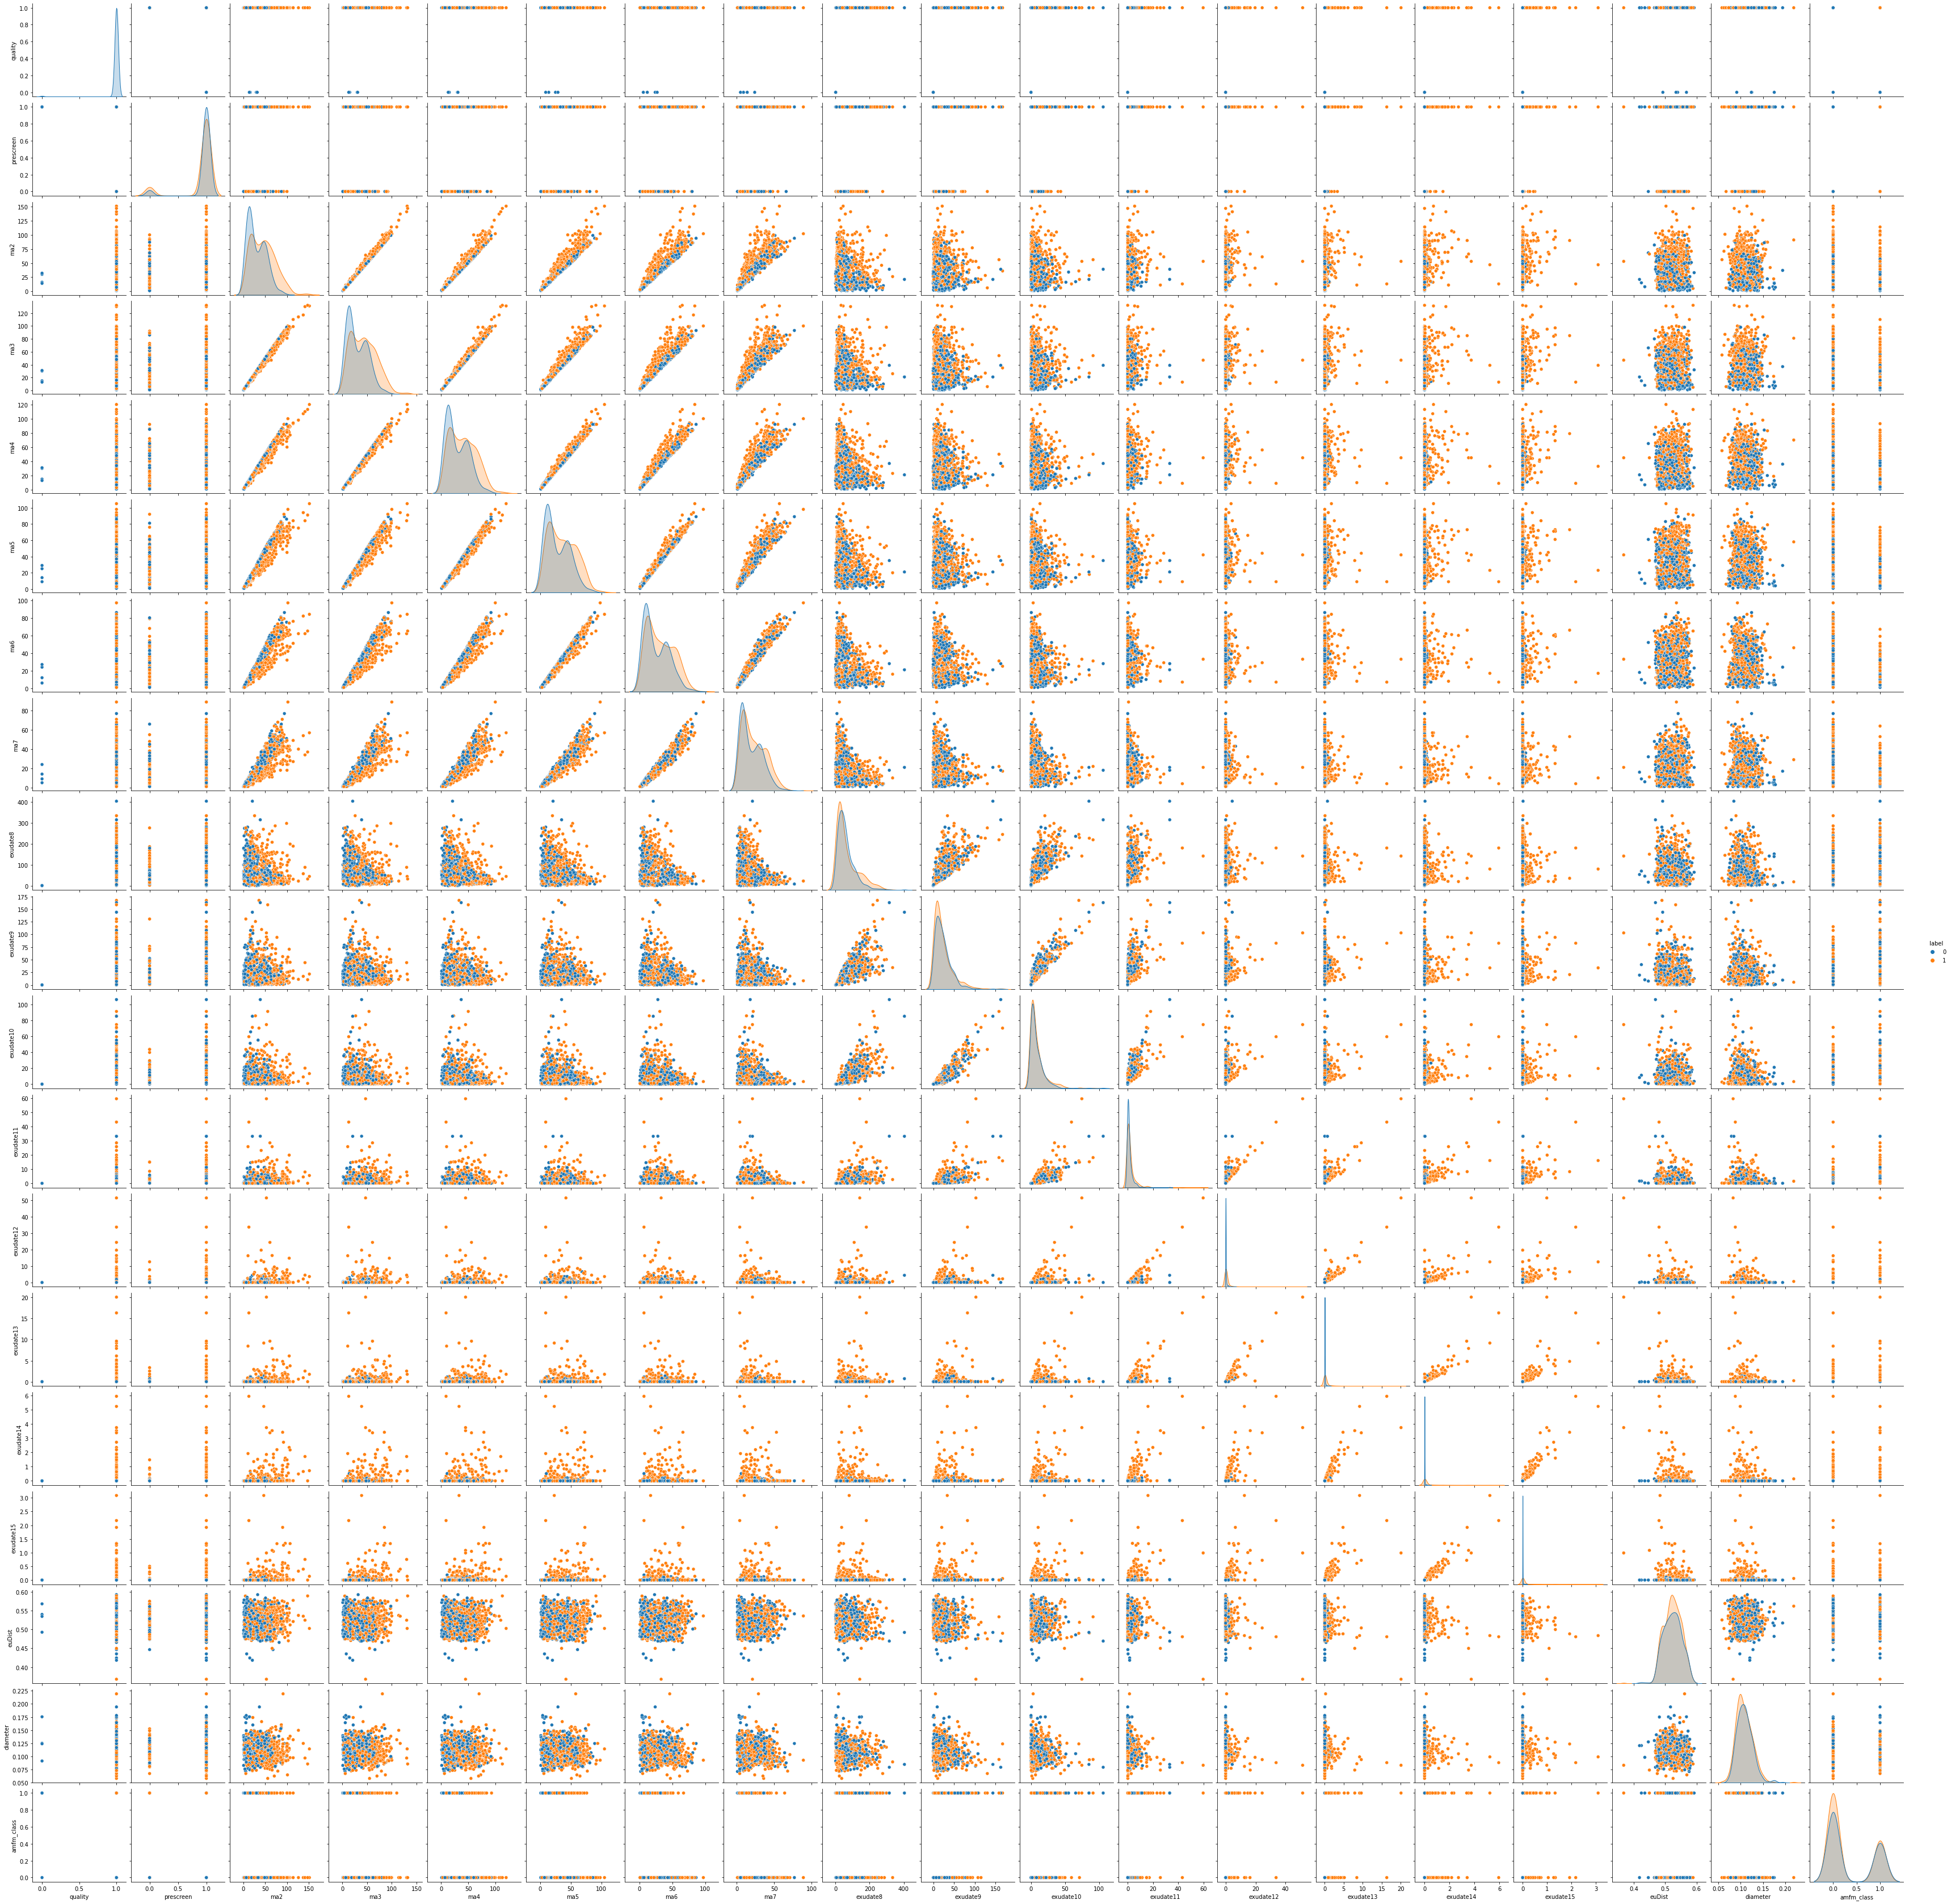

In [8]:
# Detailed distribution of the features in the dataset
sns.pairplot(data=data,hue='label',diag_kind='kde')
plt.show()

In [9]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
data.groupby(["label"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

quality  prescreen  ma2  ma3  ma4  ma5  ma6  ma7  exudate8  exudate9  \
label                                                                         
0          540        540  540  540  540  540  540  540       540       540   
1          611        611  611  611  611  611  611  611       611       611   

       exudate10  exudate11  exudate12  exudate13  exudate14  exudate15  \
label                                                                     
0            540        540        540        540        540        540   
1            611        611        611        611        611        611   

       euDist  diameter  amfm_class  
label                                
0         540       540         540  
1         611       611         611

In [10]:
labels = data['label']
features =  data.drop(labels=['label'],axis=1)

print(labels[:5])
print(features[:5])

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int64
   quality  prescreen  ma2  ma3  ma4  ma5  ma6  ma7   exudate8   exudate9  \
0        1          1   22   22   22   19   18   14  49.895756  17.775994   
1        1          1   24   24   22   18   16   13  57.709936  23.799994   
2        1          1   62   60   59   54   47   33  55.831441  27.993933   
3        1          1   55   53   53   50   43   31  40.467228  18.445954   
4        1          1   44   44   44   41   39   27  18.026254   8.570709   

   exudate10  exudate11  exudate12  exudate13  exudate14  exudate15    euDist  \
0   5.270920   0.771761   0.018632   0.006864   0.003923   0.003923  0.486903   
1   3.325423   0.234185   0.003903   0.003903   0.003903   0.003903  0.520908   
2  12.687485   4.852282   1.393889   0.373252   0.041817   0.007744  0.530904   
3   9.118901   3.079428   0.840261   0.272434   0.007653   0.001531  0.483284   
4   0.410381   0.000000   0.000000   0.000000   0.000000   0.000000  0.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test = train_test_split(features,labels,test_size=0.1,random_state=0, stratify = labels)

In [12]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
def train_Bayes(X_train,Y_train,X_test,Y_test):
  model = GaussianNB()
  model.fit(X_train,Y_train)
  prediction = model.predict(X_test)
  score = metrics.accuracy_score(prediction,Y_test)
  return score

In [13]:
#Split Data into label vs not
data_Y = labels
data_X = features
model = GaussianNB()
# your code goes here
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model,data_X,data_Y,cv=10) 
print("Accuracy1:", scores1.mean()*100)

Accuracy1: 59.77286356821588


In [14]:
scores={}
scores['Bayes'] = train_Bayes(X_train,Y_train,X_test,Y_test)
print(scores)

{'Bayes': 0.646551724137931}


GaussianNB()
AUC SCORE 0.7461170848267623


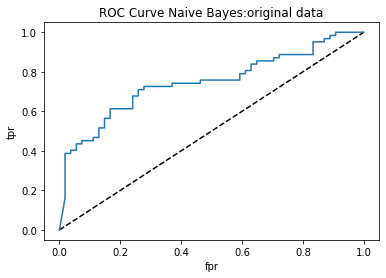

In [15]:
model1 = GaussianNB()
model1 = model1.fit(X_train,Y_train)
print(model1)

#Predict_Proba
from sklearn import metrics
prob_array = model1.predict_proba(X_test)
#len is 231
preds= prob_array[:,1];

#Create the ROC Curve
fpr, tpr,thresholds = metrics.roc_curve(Y_test,preds)

#Print the AUC
from sklearn.metrics import roc_auc_score 
print("AUC SCORE", roc_auc_score(Y_test, preds))


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes:original data')
plt.show()

Text(0.5, 15.0, 'Predicted label')

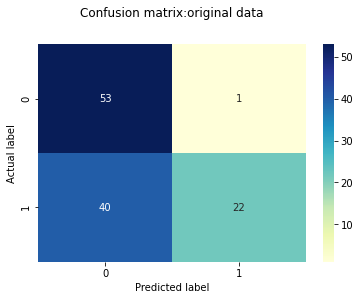

In [16]:
y_pred = model1.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix:original data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
# Classification report for precision and recall
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72        54
           1       0.96      0.35      0.52        62

    accuracy                           0.65       116
   macro avg       0.76      0.67      0.62       116
weighted avg       0.78      0.65      0.61       116



In [18]:
#The main goal of a PCA analysis is to identify patterns in data. PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print('PCA sum: {:.2f}%'.format(sum(pca.explained_variance_ratio_) * 100))

[0.63584834 0.31792865]
PCA sum: 95.38%


**TRYING STANDARDISATION **

In [19]:
data.head()

quality  prescreen  ma2  ma3  ma4  ma5  ma6  ma7   exudate8   exudate9  \
0        1          1   22   22   22   19   18   14  49.895756  17.775994   
1        1          1   24   24   22   18   16   13  57.709936  23.799994   
2        1          1   62   60   59   54   47   33  55.831441  27.993933   
3        1          1   55   53   53   50   43   31  40.467228  18.445954   
4        1          1   44   44   44   41   39   27  18.026254   8.570709   

   exudate10  exudate11  exudate12  exudate13  exudate14  exudate15    euDist  \
0   5.270920   0.771761   0.018632   0.006864   0.003923   0.003923  0.486903   
1   3.325423   0.234185   0.003903   0.003903   0.003903   0.003903  0.520908   
2  12.687485   4.852282   1.393889   0.373252   0.041817   0.007744  0.530904   
3   9.118901   3.079428   0.840261   0.272434   0.007653   0.001531  0.483284   
4   0.410381   0.000000   0.000000   0.000000   0.000000   0.000000  0.475935   

   diameter  amfm_class  label  
0  0.100025           1      0  
1  0.144414           0      0  
2  0.128548           0      1  
3  0.114790           0      0  
4  0.123572           0      1

In [20]:
from sklearn.preprocessing import StandardScaler
features_standard=StandardScaler().fit_transform(data[data.columns[:19]])
x=pd.DataFrame(features_standard,columns=[['quality','prescreen','ma2','ma3','ma4','ma5','ma6','ma7','exudate8','exudate9','exudate10','exudate11','exudate12','exudate13','exudate14','exudate15','euDist','diameter','amfm_class']])
x.head()

quality prescreen       ma2       ma3       ma4       ma5       ma6  \
0  0.059054  0.298213 -0.641486 -0.618782 -0.576463 -0.630029 -0.551116   
1  0.059054  0.298213 -0.563391 -0.535778 -0.576463 -0.677410 -0.653676   
2  0.059054  0.298213  0.920417  0.958299  1.046665  1.028299  0.936006   
3  0.059054  0.298213  0.647084  0.667784  0.783456  0.838776  0.730886   
4  0.059054  0.298213  0.217561  0.294265  0.388641  0.412349  0.525766   

        ma7  exudate8  exudate9 exudate10 exudate11 exudate12 exudate13  \
0 -0.473745 -0.242917 -0.246003 -0.296966 -0.271509 -0.218324 -0.194409   
1 -0.539992 -0.109250  0.032972 -0.465224 -0.408593 -0.224256 -0.197212   
2  0.784951 -0.141383  0.227196  0.344463  0.769037  0.335538  0.152330   
3  0.652456 -0.404199 -0.214977  0.035830  0.316953  0.112573  0.056919   
4  0.387468 -0.788069 -0.672306 -0.717335 -0.468311 -0.225828 -0.200905   

  exudate14 exudate15    euDist  diameter amfm_class  
0 -0.205124 -0.186169 -1.294763 -0.468656   1.405048  
1 -0.205175 -0.186281 -0.082168  2.006054  -0.711719  
2 -0.110043 -0.164808  0.274283  1.121516  -0.711719  
3 -0.195765 -0.199541 -1.423814  0.354501  -0.711719  
4 -0.214968 -0.208100 -1.685874  0.844102  -0.711719

In [21]:
scaled_features = x[x.columns[:19]]
X_trainscaled, X_testscaled , Y_trainscaled , Y_testscaled = train_test_split(scaled_features,labels,test_size=0.1,random_state=0, stratify = labels)


In [22]:
#Split Data into label vs not
model = GaussianNB()
data_Y = labels
data_X = scaled_features
# your code goes here
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(model,data_X,data_Y,cv=10) 
print("Accuracy1:", scores1.mean()*100)
print("Accuracy2:", scores2.mean()*100)

Accuracy1: 59.77286356821588
Accuracy2: 62.98650674662669


In [23]:
scores_scaled={}

scores_scaled['Bayes'] = train_Bayes(X_trainscaled,Y_trainscaled,X_testscaled,Y_testscaled)

print(scores,"before scaling")
print(scores_scaled,"after Standardization")

{'Bayes': 0.646551724137931} before scaling
{'Bayes': 0.6896551724137931} after Standardization


GaussianNB()
AUC SCORE 0.7461170848267623


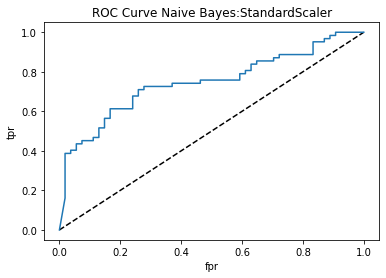

In [24]:
model2 = GaussianNB()
model2 = model2.fit(X_trainscaled,Y_trainscaled)
print(model2)

#Predict_Proba
from sklearn import metrics
prob_array = model2.predict_proba(X_testscaled)
#len is 231
preds= prob_array[:,1];

#Create the ROC Curve
fpr, tpr,thresholds = metrics.roc_curve(Y_testscaled,preds)

#Print the AUC
from sklearn.metrics import roc_auc_score 
print("AUC SCORE", roc_auc_score(Y_testscaled, preds))


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes:StandardScaler')
plt.show()

Text(0.5, 15.0, 'Predicted label')

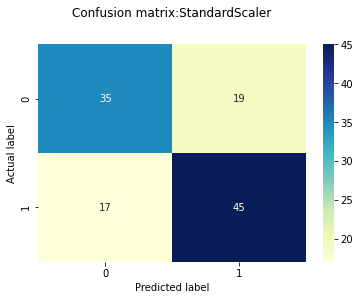

In [25]:
y_pred = model2.predict(X_testscaled)
cnf_matrix = metrics.confusion_matrix(Y_testscaled, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix:StandardScaler', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
# Classification report for precision and recall
from sklearn.metrics import classification_report
print(classification_report(Y_testscaled, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66        54
           1       0.70      0.73      0.71        62

    accuracy                           0.69       116
   macro avg       0.69      0.69      0.69       116
weighted avg       0.69      0.69      0.69       116



In [27]:
from sklearn.preprocessing import MinMaxScaler
features_min_max_scaler=MinMaxScaler().fit_transform(data[data.columns[:19]])
x=pd.DataFrame(features_min_max_scaler,columns=[['quality','prescreen','ma2','ma3','ma4','ma5','ma6','ma7','exudate8','exudate9','exudate10','exudate11','exudate12','exudate13','exudate14','exudate15','euDist','diameter','amfm_class']])
x.head()

quality prescreen       ma2       ma3       ma4       ma5       ma6  \
0     1.0       1.0  0.140000  0.160305  0.176471  0.173077  0.177083   
1     1.0       1.0  0.153333  0.175573  0.176471  0.163462  0.156250   
2     1.0       1.0  0.406667  0.450382  0.487395  0.509615  0.479167   
3     1.0       1.0  0.360000  0.396947  0.436975  0.471154  0.437500   
4     1.0       1.0  0.286667  0.328244  0.361345  0.384615  0.395833   

        ma7  exudate8  exudate9 exudate10 exudate11 exudate12 exudate13  \
0  0.147727  0.122764  0.106359  0.049693  0.012913  0.000362  0.000342   
1  0.136364  0.142126  0.142403  0.031351  0.003918  0.000076  0.000194   
2  0.363636  0.137472  0.167497  0.119614  0.081188  0.027106  0.018571   
3  0.340909  0.099403  0.110368  0.085971  0.051525  0.016340  0.013555   
4  0.295455  0.043799  0.051281  0.003869  0.000000  0.000000  0.000000   

  exudate14 exudate15    euDist  diameter amfm_class  
0  0.000661  0.001271  0.530801  0.261133        1.0  
1  0.000657  0.001264  0.682302  0.536341        0.0  
2  0.007043  0.002509  0.726836  0.437973        0.0  
3  0.001289  0.000496  0.514678  0.352675        0.0  
4  0.000000  0.000000  0.481936  0.407122        0.0

In [28]:
min_max_scaler_features = x[x.columns[:19]]
X_trainscaler, X_testscaler , Y_trainscaler , Y_testscaler = train_test_split(min_max_scaler_features,labels,test_size=0.1,random_state=0, stratify = labels)


In [29]:
#Split Data into label vs not
model = GaussianNB()
data_Y = labels
data_X = min_max_scaler_features
# your code goes here
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(model,data_X,data_Y,cv=10) 
print("Accuracy1:", scores1.mean()*100)
print("Accuracy2:", scores2.mean()*100)
print("Accuracy3:", scores3.mean()*100)


Accuracy1: 59.77286356821588
Accuracy2: 62.98650674662669
Accuracy3: 64.28785607196403


In [30]:
scores_scaler={}

scores_scaler['Bayes'] = train_Bayes(X_trainscaler,Y_trainscaler,X_testscaler,Y_testscaler)

print(scores,"before scaling")
print(scores_scaled,"after Standardization")
print(scores_scaler,"after MinMaxScaler")

{'Bayes': 0.646551724137931} before scaling
{'Bayes': 0.6896551724137931} after Standardization
{'Bayes': 0.6982758620689655} after MinMaxScaler


GaussianNB()
AUC SCORE 0.7461170848267623


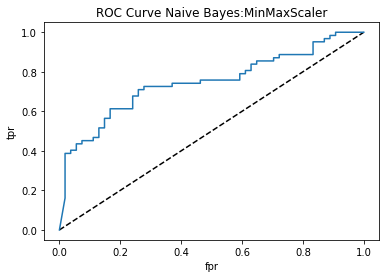

In [31]:
model3 = GaussianNB()
model3 = model3.fit(X_trainscaler,Y_trainscaler)
print(model3)

#Predict_Proba
from sklearn import metrics
prob_array = model3.predict_proba(X_testscaler)
#len is 231
preds= prob_array[:,1];

#Create the ROC Curve
fpr, tpr,thresholds = metrics.roc_curve(Y_testscaler,preds)

#Print the AUC
from sklearn.metrics import roc_auc_score 
print("AUC SCORE", roc_auc_score(Y_testscaler, preds))


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes:MinMaxScaler')
plt.show()

Text(0.5, 15.0, 'Predicted label')

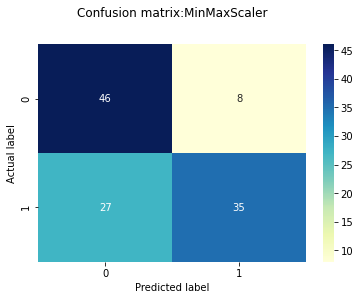

In [32]:
y_pred = model3.predict(X_testscaler)
cnf_matrix = metrics.confusion_matrix(Y_testscaler, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix:MinMaxScaler', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# Classification report for precision and recall
from sklearn.metrics import classification_report
print(classification_report(Y_testscaler, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.85      0.72        54
           1       0.81      0.56      0.67        62

    accuracy                           0.70       116
   macro avg       0.72      0.71      0.70       116
weighted avg       0.73      0.70      0.69       116



**After Feature Extraction**

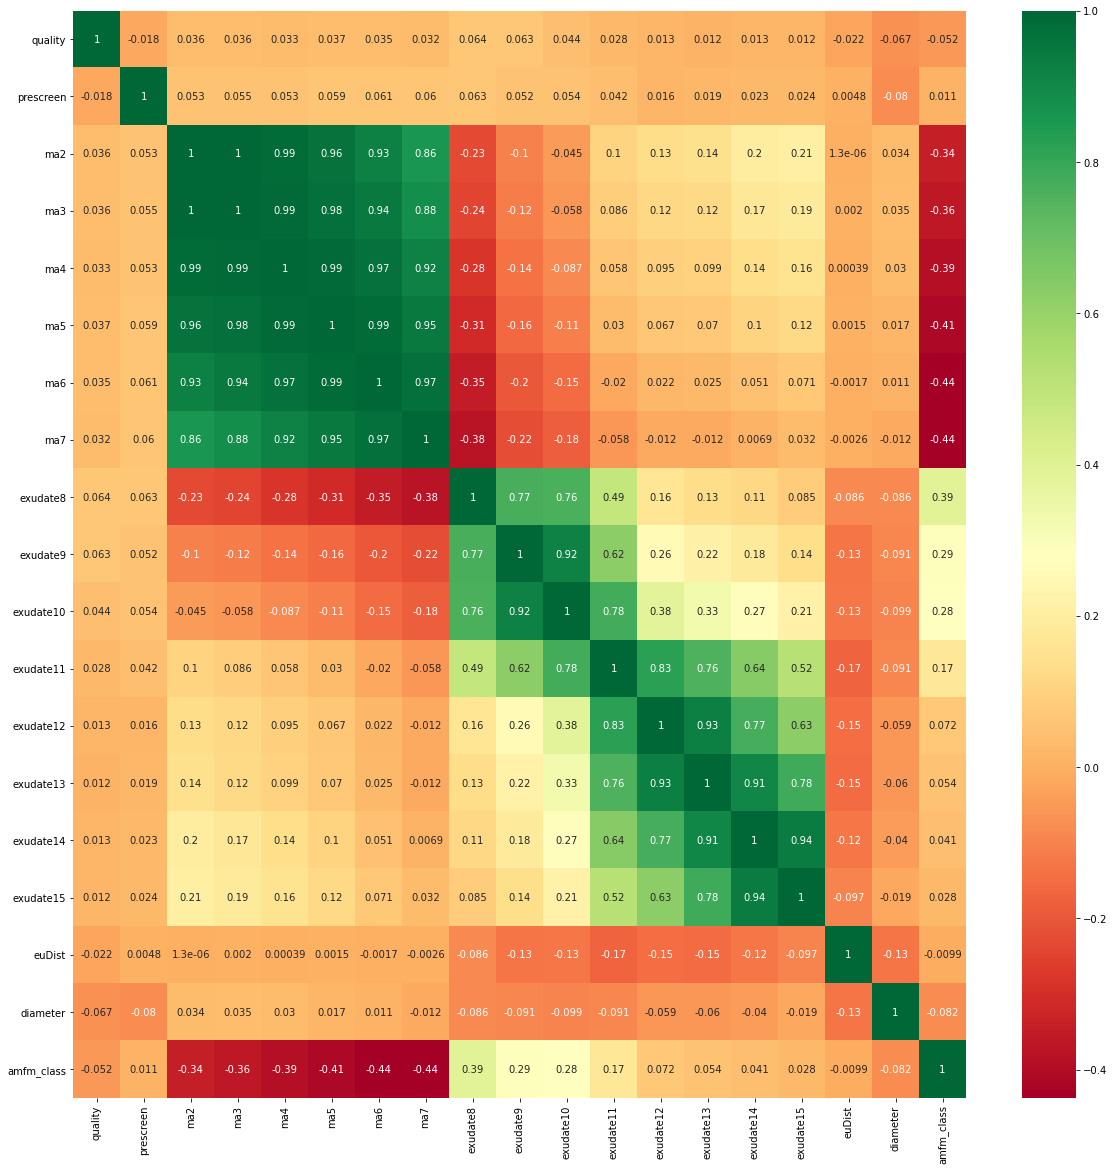

In [34]:
# to check if features are corelated
#A matrix of correlations provides useful insight into relationships between pairs of variables
sns.heatmap(data[data.columns[:19]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

# features not corelated

In [35]:
# using random forest for feature extraction

from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=min_max_scaler_features
Y=data['label']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

exudate8      0.088261
ma2           0.086140
diameter      0.071716
exudate9      0.069399
exudate10     0.069005
euDist        0.066556
ma3           0.064880
exudate11     0.062418
exudate14     0.056256
ma4           0.054694
ma7           0.053883
ma5           0.051733
ma6           0.051082
exudate12     0.049427
exudate15     0.045881
exudate13     0.040858
amfm_class    0.008875
prescreen     0.007869
quality       0.001067
dtype: float64

In [36]:
final_features = x[['exudate8','ma2','exudate9','diameter','exudate10','euDist','ma3','exudate11','exudate14','ma4']]

final_features.head()

exudate8       ma2  exudate9  diameter exudate10    euDist       ma3  \
0  0.122764  0.140000  0.106359  0.261133  0.049693  0.530801  0.160305   
1  0.142126  0.153333  0.142403  0.536341  0.031351  0.682302  0.175573   
2  0.137472  0.406667  0.167497  0.437973  0.119614  0.726836  0.450382   
3  0.099403  0.360000  0.110368  0.352675  0.085971  0.514678  0.396947   
4  0.043799  0.286667  0.051281  0.407122  0.003869  0.481936  0.328244   

  exudate11 exudate14       ma4  
0  0.012913  0.000661  0.176471  
1  0.003918  0.000657  0.176471  
2  0.081188  0.007043  0.487395  
3  0.051525  0.001289  0.436975  
4  0.000000  0.000000  0.361345

In [37]:
X_final, X_testfinal , Y_final , Y_testfinal = train_test_split(final_features,labels,test_size=0.10,random_state=0, stratify = labels)


In [38]:
#Split Data into label vs not
model = GaussianNB()
data_Y = labels
data_X = final_features
# your code goes here
from sklearn.model_selection import cross_val_score
scores4 = cross_val_score(model,data_X,data_Y,cv=10) 
print("Accuracy1:", scores1.mean()*100)
print("Accuracy2:", scores2.mean()*100)
print("Accuracy3:", scores3.mean()*100)
print("Accuracy4:", scores4.mean()*100)

Accuracy1: 59.77286356821588
Accuracy2: 62.98650674662669
Accuracy3: 64.28785607196403
Accuracy4: 61.1656671664168


In [39]:
scores_final={}

scores_final['Bayes'] = train_Bayes(X_final,Y_final,X_testfinal, Y_testfinal)

print(scores,"before scaling")
print(scores_scaled,"after Standardization")
print(scores_scaler,"after MinMaxScaler")
print(scores_final,"after min_max_scaler&selection ")

{'Bayes': 0.646551724137931} before scaling
{'Bayes': 0.6896551724137931} after Standardization
{'Bayes': 0.6982758620689655} after MinMaxScaler
{'Bayes': 0.6810344827586207} after min_max_scaler&selection 


GaussianNB()
AUC SCORE 0.7267025089605735


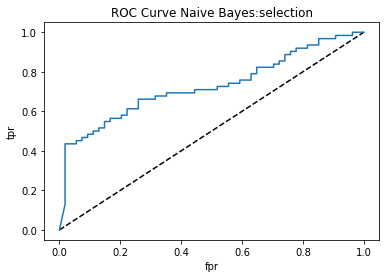

In [40]:
model4 = GaussianNB()
model4 = model4.fit(X_final,Y_final)
print(model4)

#Predict_Proba
from sklearn import metrics
prob_array = model4.predict_proba(X_testfinal)
#len is 231
preds= prob_array[:,1];

#Create the ROC Curve
fpr, tpr,thresholds = metrics.roc_curve(Y_testfinal,preds)

#Print the AUC
from sklearn.metrics import roc_auc_score 
print("AUC SCORE", roc_auc_score(Y_testfinal,preds))


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes:selection')
plt.show()

Text(0.5, 15.0, 'Predicted label')

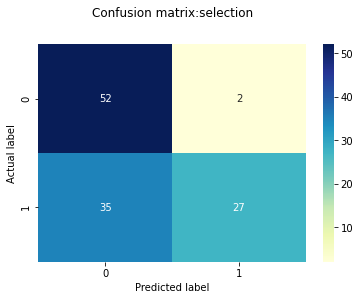

In [41]:
y_pred = model4.predict(X_testfinal)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_testfinal, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix:selection', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
# Classification report for precision and recall
from sklearn.metrics import classification_report
print(classification_report(Y_testfinal, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74        54
           1       0.93      0.44      0.59        62

    accuracy                           0.68       116
   macro avg       0.76      0.70      0.67       116
weighted avg       0.78      0.68      0.66       116



In [43]:
# Finding IQR for filtering outliers in dataset 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# No of records after removing outliers
data_out.shape
data_out.head()

quality  prescreen  ma2  ma3  ma4  ma5  ma6  ma7   exudate8   exudate9  \
0        1          1   22   22   22   19   18   14  49.895756  17.775994   
1        1          1   24   24   22   18   16   13  57.709936  23.799994   
4        1          1   44   44   44   41   39   27  18.026254   8.570709   
5        1          1   44   43   41   41   37   29  28.356400   6.935636   
7        1          1    6    6    6    6    2    1  20.679649   9.497786   

   exudate10  exudate11  exudate12  exudate13  exudate14  exudate15    euDist  \
0   5.270920   0.771761   0.018632   0.006864   0.003923   0.003923  0.486903   
1   3.325423   0.234185   0.003903   0.003903   0.003903   0.003903  0.520908   
4   0.410381   0.000000   0.000000   0.000000   0.000000   0.000000  0.475935   
5   2.305771   0.323724   0.000000   0.000000   0.000000   0.000000  0.502831   
7   1.223660   0.150382   0.000000   0.000000   0.000000   0.000000  0.576318   

   diameter  amfm_class  label  
0  0.100025           1      0  
1  0.144414           0      0  
4  0.123572           0      1  
5  0.126741           0      1  
7  0.071071           1      0

In [44]:
# Splitting the filtered data into training and test set
array = data_out.values
x = data_out.iloc[:,0:19]
y = data_out.iloc[:,19]
test_size = 0.10 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [45]:
clf = GaussianNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [46]:
scores_iqr={}

scores_iqr['Bayes'] = train_Bayes(x_train,y_train,x_test,y_test)

print(scores,"before scaling")
print(scores_scaled,"after Standardization")
print(scores_scaler,"after MinMaxScaler")
print(scores_final,"after min_max_scaler&selection ")
print(scores_iqr,"after IQR ")

{'Bayes': 0.646551724137931} before scaling
{'Bayes': 0.6896551724137931} after Standardization
{'Bayes': 0.6982758620689655} after MinMaxScaler
{'Bayes': 0.6810344827586207} after min_max_scaler&selection 
{'Bayes': 0.6388888888888888} after IQR 


In [47]:
#Split Data into label vs not
model = GaussianNB()
# your code goes here

from sklearn.model_selection import cross_val_score
scores5 = cross_val_score(model,x,y,cv=10) 
print("Accuracy1:", scores1.mean()*100)
print("Accuracy2:", scores2.mean()*100)
print("Accuracy3:", scores3.mean()*100)
print("Accuracy4:", scores4.mean()*100)
print("Accuracy5:", scores5.mean()*100)

Accuracy1: 59.77286356821588
Accuracy2: 62.98650674662669
Accuracy3: 64.28785607196403
Accuracy4: 61.1656671664168
Accuracy5: 57.25743348982786


GaussianNB()
AUC SCORE 0.6664092664092665


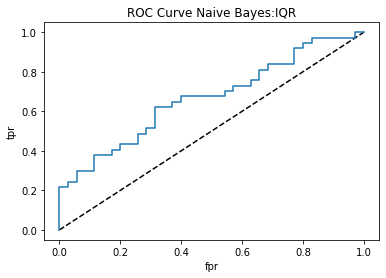

In [48]:
model5 = GaussianNB()
model5 = model5.fit(x_train,y_train)
print(model5)

#Predict_Proba
from sklearn import metrics
prob_array = model5.predict_proba(x_test)
#len is 231
preds= prob_array[:,1];

#Create the ROC Curve
fpr, tpr,thresholds = metrics.roc_curve(y_test,preds)

#Print the AUC
from sklearn.metrics import roc_auc_score 
print("AUC SCORE", roc_auc_score(y_test, preds))


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes:IQR')
plt.show()

Text(0.5, 15.0, 'Predicted label')

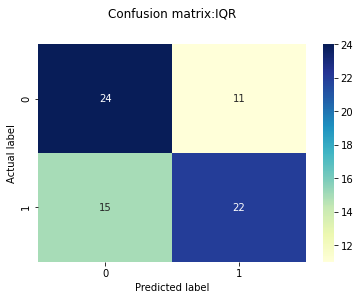

In [49]:
y_pred = model5.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix:IQR', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        35
           1       0.67      0.59      0.63        37

    accuracy                           0.64        72
   macro avg       0.64      0.64      0.64        72
weighted avg       0.64      0.64      0.64        72



In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test = train_test_split(features,labels,test_size=0.1,random_state=0, stratify = labels)

In [52]:
#The main goal of a PCA analysis is to identify patterns in data. PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print('PCA sum: {:.2f}%'.format(sum(pca.explained_variance_ratio_) * 100))

[0.63584834 0.31792865]
PCA sum: 95.38%


In [53]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
def train_Bayes(X_train,Y_train,X_test,Y_test):
  model = GaussianNB()
  model.fit(X_train,Y_train)
  prediction = model.predict(X_test)
  score = metrics.accuracy_score(prediction,Y_test)
  return score

In [54]:
#Split Data into label vs not
data_Y = labels
data_X = features
model = GaussianNB()
# your code goes here
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model,data_X,data_Y,cv=10) 
print("Accuracy1:", scores1.mean()*100)

Accuracy1: 59.77286356821588


In [55]:
scores={}
scores['Bayes'] = train_Bayes(X_train,Y_train,X_test,Y_test)
print(scores)

{'Bayes': 0.6293103448275862}


In [71]:
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV
import numpy as np
strat_k_fold = StratifiedKFold(n_splits=10,random_state=42,fold_shuffle=True)
c_values = list(np.arange(1, 100))

param_grid = [
    {
        'C': c_values,
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'multi_class': ['ovr'],
        'random_state': [0]
    },
    {
        'C': c_values,
        'penalty': ['l2'],
        'solver': ['liblinear', 'newton-cg', 'lbfgs'],
        'multi_class': ['ovr'],
        'random_state': [0]
    }
]

grid = GridSearchCV(
    GaussianNB(),
    param_grid,
    cv=strat_k_fold,
    scoring='f1'
)
grid.fit(features, labels)

# Best LogisticRegression parameters
print(grid.best_params_)
# Best score for LogisticRegression with best parameters
print('Best score: {:.2f}%'.format(grid.best_score_ * 100))

TypeError: __init__() got an unexpected keyword argument 'fold_shuffle'